In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
from google.colab import drive
# drive.mount('/content/drive')

In [3]:
dataset = pd.read_csv('/content/drive/My Drive/semantic-question-matching/Features/final_features.csv', delimiter='\t')
dataset.head(2)

,question1,question2,is_duplicate,len_q1,len_q2,diff_len,len_char_q1,len_char_q2,len_word_q1,len_word_q2,common_words,fuzz_qratio,fuzz_WRatio,fuzz_partial_ratio,fuzz_partial_token_set_ratio,fuzz_partial_token_sort_ratio,fuzz_token_set_ratio,fuzz_token_sort_ratio,wmd,norm_wmd,cosine_distance,cityblock_distance,jaccard_distance,canberra_distance,euclidean_distance,minkowski_distance,braycurtis_distance,skew_q1vec,skew_q2vec,kur_q1vec,kur_q2vec
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57,9,20,20,14,12,10,93,95,98,100,89,100,93,0.564615,0.217555,0.037908,3.774843,1.0,75.949318,0.275348,0.125323,0.137314,0.008893,-0.099771,0.108845,0.344742
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88,-37,21,29,8,13,4,66,86,73,100,75,86,63,3.772346,1.368796,0.574596,15.130415,1.0,190.766894,1.072004,0.482108,0.648993,0.027151,0.060190,0.310524,0.033802


In [0]:
dataset.replace(to_replace=np.inf, value=np.nan, inplace=True)
dataset.dropna(axis=0, inplace=True)

In [0]:
#diff_len, common_words,  fuzz_qratio ,fuzz_WRatio,fuzz_partial_ratio,fuzz_partial_token_set_ratio,  fuzz_partial_token_sort_ratio,  fuzz_token_set_ratio, fuzz_token_sort_ratio,cosine_distance, cityblock_distance, canberra_distance,euclidean_distance,minkowski_distance  and  braycurtis_distance. 
X = dataset.iloc[:, [5,10,11,12,13,14,15,16,17,18,20,21,23,24,25,26]].values
y = dataset.iloc[:, 2].values

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [0]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [0]:
import pickle

In [20]:
classifier = pickle.load(open("ANN_7256.model", "rb"))
classifier

In [21]:
y_pred = classifier.predict(X_test)
y_pred

array([[0.43109915],
       [0.4833173 ],
       [0.6338772 ],
       ...,
       [0.6595024 ],
       [0.5333557 ],
       [0.4138293 ]], dtype=float32)

In [0]:
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)

In [28]:
# calculate AUC
auc = roc_auc_score(Y_test, y_pred)
print('AUC: %.3f' % auc)

AUC: 0.802


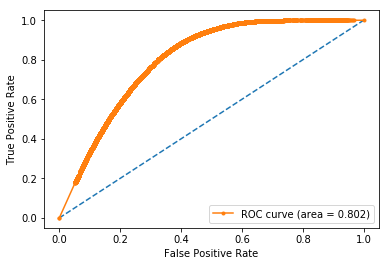

In [36]:
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.', label='ROC curve (area = %0.3f)' % auc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
# show the plot
plt.show()